# Lending Data - Case Study 

In [86]:
# Import required libraries
import numpy as np                    # Math lib
import pandas as pd                   # For data processing
import matplotlib.pyplot as plt       # For visualizations
import seaborn as sns                 # For visualizations
import warnings
warnings.filterwarnings("ignore")

## Data

In [87]:
# Read the load data file and display first 5 records
loandata = pd.read_csv('/Users/Durga/Downloads/Lending Data - Case Study - First Assignment/loan.csv',low_memory=False)
loandata.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data overview

In [88]:
# check the shape of the dataframe
loandata.shape

(39717, 111)

In [89]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


## Data Cleaning

### Fixing Rows 

1. There are no unnecessary header or footer records on looking into the dataset
2. No summary rows for deletion
3. Determine if there are duplicate rows
4. The analysis is to determine the variables that are driving factors when a borrower defaults. So we will keep rows only that are Fullypaid/Chargedoff

In [90]:
#Checking on the ID column
loandata.id.nunique()
#There are no extra rows as column ID has unique values. So rows are good

39717

In [91]:
# Loan status as 'Current' can be removed from our analysis
loandata = loandata[(loandata.loan_status == 'Fully Paid') | (loandata.loan_status == 'Charged Off')]
loandata.shape

(38577, 111)

### Fixing Columns 

### Delete unnecessary columns

1. Find the percentage of missing values in each column.
2. Remove columns which have missing values more than 80%

In [92]:
percent_missing = loandata.isnull().sum() * 100 / len(loandata)
percent_missing

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

On a quick look into the dataset there seems a number of columns with NaN values in the entire column. 
Let's drop columns with a missing values percentage greater than or equal to 80%

In [93]:
min_perc = 80.0
min_drop =  int(((100-min_perc) / 100) * loandata.shape[0] + 1)
loandata = loandata.dropna(axis=1,thresh=min_drop)
loandata.shape

(38577, 55)

Looking at missing percentages most of the columns has missing data less than one percentage. Let's try to eliminate futher by dropping the minimum threshold of missing values to 30%

In [94]:
min_perc = 30.0
min_drop =  int(((100-min_perc) / 100) * loandata.shape[0] + 1)
loandata = loandata.dropna(axis=1,thresh=min_drop)

In [95]:
# Columns - pymnt_plan, initial_list_status, policy_code, application_type, collections_12_mths_ex_med, delinq_amnt,acc_now_delinq have the same value in entire columns and might not provide a relevant info. Let's remove these
# Column - url is the individual link to loan application and we already have the loan id in a separate column. We don't require this.
loandata.drop(['pymnt_plan','url','initial_list_status','policy_code','application_type'],axis=1,inplace=True)

For our analysis we are interested only in variables that contribute to default. So any behavioural variables are related to the loans that are in current status and are not available at the time of loan application. These can be dropped as well

In [96]:
loandata = loandata.drop(loandata.iloc[:,22:42],axis = 1)
loandata = loandata.drop(loandata.columns[[22,26,27]],axis=1)

In [97]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        38577 non-null  int64  
 1   member_id                 38577 non-null  int64  
 2   loan_amnt                 38577 non-null  int64  
 3   funded_amnt               38577 non-null  int64  
 4   funded_amnt_inv           38577 non-null  float64
 5   term                      38577 non-null  object 
 6   int_rate                  38577 non-null  object 
 7   installment               38577 non-null  float64
 8   grade                     38577 non-null  object 
 9   sub_grade                 38577 non-null  object 
 10  emp_title                 36191 non-null  object 
 11  emp_length                37544 non-null  object 
 12  home_ownership            38577 non-null  object 
 13  annual_inc                38577 non-null  float64
 14  verifi

## Data Manipulation/Imputation

### Split columns

In [98]:
# Lets extract year from issue_d, last_pymnt_d into separate columns
loandata['issue_y'] = pd.to_datetime(loandata['issue_d'],format='%b-%y').dt.year

### Check for Missing values in columns and datatypes of the remaining columns

In [99]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        38577 non-null  int64  
 1   member_id                 38577 non-null  int64  
 2   loan_amnt                 38577 non-null  int64  
 3   funded_amnt               38577 non-null  int64  
 4   funded_amnt_inv           38577 non-null  float64
 5   term                      38577 non-null  object 
 6   int_rate                  38577 non-null  object 
 7   installment               38577 non-null  float64
 8   grade                     38577 non-null  object 
 9   sub_grade                 38577 non-null  object 
 10  emp_title                 36191 non-null  object 
 11  emp_length                37544 non-null  object 
 12  home_ownership            38577 non-null  object 
 13  annual_inc                38577 non-null  float64
 14  verifi

### Fill missing values and fix data 

The following columns has missing values
1. emp_title  - Can be ignored as the title of employment will differ for each job. Imputing makes no sense
2. title      - Can be imputed with data from purpose

Fix data 
1. Remove the % on int_rate and revol_util columns and convert it to a float value from string
2. Extract only the number of years from emp_length column
3. Title has only 11 missing values. Let's check if that can be replaced with values from Purpose

In [100]:
def clean_data(x):
    return float(x.replace('%',''))

In [101]:
# Interest rate is object and we shall convert to float for analysis
loandata.int_rate = loandata.int_rate.apply(clean_data)

In [102]:
#Extract only the number from emp_length column 
loandata.emp_length = loandata.emp_length.str.extract('(\d+)')

In [103]:
#Replace missing title with values from purpose 
loandata.title.fillna(loandata.purpose,inplace=True)
loandata.title.isnull().sum()

0

#### Sanity check 

In [104]:
    # Check if there are any other loan status
print (loandata.loan_status.value_counts())
print (loandata.loan_status.isnull().sum())

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64
0


In [105]:
# Make sure again to drop any duplicates
loandata = loandata.drop_duplicates(keep='first')
loandata.shape

(38577, 26)

In [106]:
# Check if there are any rows where funded_amnt_inv is greater than loan_amnt 
a = loandata[(loandata.funded_amnt_inv > loandata.loan_amnt)]
a

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,loan_status,purpose,title,zip_code,addr_state,dti,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,issue_y


In [107]:
# Check if there are any rows where funded_amnt_inv is greater than funded_amnt 
b = loandata[(loandata.funded_amnt_inv > loandata.funded_amnt)]
b

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,loan_status,purpose,title,zip_code,addr_state,dti,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,issue_y


In [108]:
# Check if there are any rows where funded_amnt is greater than loan_amnt 
c = loandata[(loandata.funded_amnt > loandata.loan_amnt)]
c

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,loan_status,purpose,title,zip_code,addr_state,dti,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,issue_y


### Determine if there are any outliers

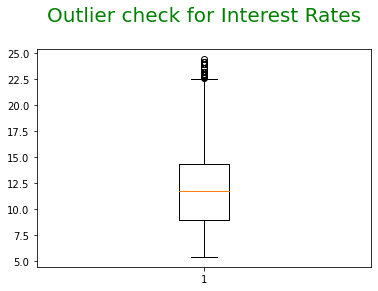

In [109]:
#Check for outlier in interest rate column
plt.boxplot(loandata.int_rate)
plt.title('Outlier check for Interest Rates\n',fontsize=20,color='g')
plt.show()

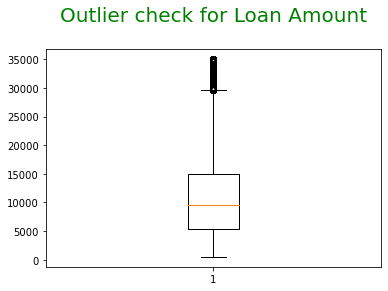

In [110]:
#plot loan_amnt to determine outlier
plt.boxplot(loandata.loan_amnt)
plt.title('Outlier check for Loan Amount\n',fontsize=20,color='g')
plt.show()

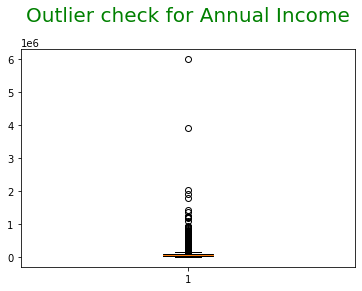

In [111]:
#Plot annual income to find outliers
plt.boxplot(loandata.annual_inc)
plt.title('Outlier check for Annual Income\n',fontsize=20,color='g')
plt.show()

##### Insights:
From the above box plot we see that 
1. The 75th Percentile for int_rate falls between 12.5% and 15.0%. There are loan applicaitons which have int_rate beyond the 75th percentile
2. Loan amount has 75th percentile around 15K. Max goes around 35K which is not a huge amount. We cannot consider this loan amounts having outliers for our analysis
3. Annual income on the whole is less than 100K which is very common in US

##### Recommendations:
We will retain the dataframe as the number of records is minimal and will not impact analysis.

## Univariate Analysis

#### 1. Plot a histogram to view the distribution of interest rates 

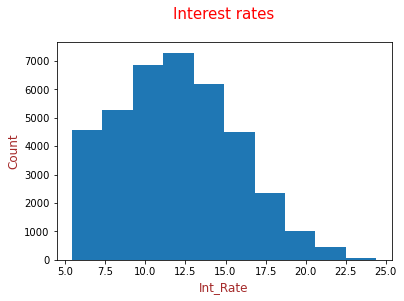

In [112]:
# Plot a histogram to view the frequency of various interest rates
plt.title('Interest rates\n',fontsize=15,color='red')
plt.hist(loandata.int_rate,bins=10)
plt.xlabel("Int_Rate", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.show()

### Insights

The above plot shows that borrowers who get an interest rate between 10.0 to 15.0 percentage is comparably higher and the number of loans with interest rate going beyond 15.0 gradually slows down


#### 2. Plot the frequency map for annual income of the borrowers 

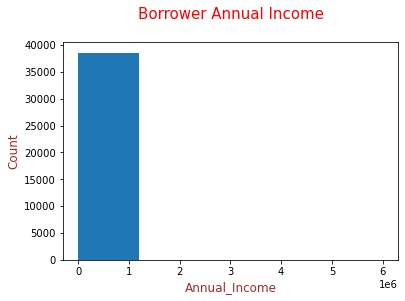

In [113]:
# Plot histogram to see the frequency of annual income 
plt.title('Borrower Annual Income\n',fontsize=15,color='red')
plt.hist(loandata.annual_inc,bins=5)
plt.xlabel("Annual_Income", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.show()

### Insights
##### The above plot shows that number of borrowers who have an annual income ranging from 0K to 15K are around same value

#### 3. Plot for installments column - How amount of installements is distributed

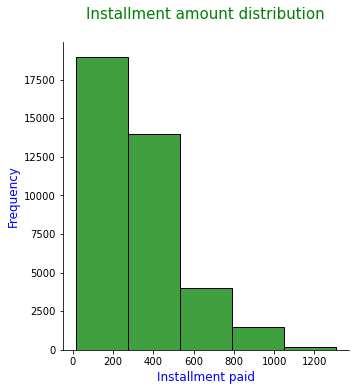

In [114]:
# Plot installements to see its distribution
sns.displot(loandata.installment,bins=5,color='g')
plt.title('Installment amount distribution\n',fontsize=15,color='green')
plt.xlabel("Installment paid", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'blue'})
plt.ylabel("Frequency", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'blue'})
plt.show()

### Insights
The installment amount as we see gradually increases and reaches it peak around 200 - 400 and gradually decreases. Most borrowers pay around 200 - 400

### Segmented univariate

#### 4. Plot to view the stauts of loans is composed

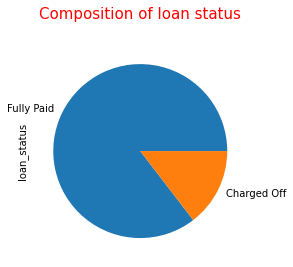

In [115]:
# Plot a pie chart to view how the loan status is composed of
loandata.loan_status.value_counts().plot.pie()
plt.title('Composition of loan status\n',fontsize=15,color='red')
plt.show()

### Insights
Most of the loans are paid in full and few are charged off. A percentage helps to understand better.

In [116]:
# Determine the percentage of loans in each status
(loandata.groupby(by='loan_status').size())/(loandata.loan_status.count())*100

loan_status
Charged Off    14.586412
Fully Paid     85.413588
dtype: float64

Of the total loans around 14% is being charged-off. 

##### Let's also review/plot the verification status 

verification_status
Not Verified       43.274490
Source Verified    25.084895
Verified           31.640615
dtype: float64


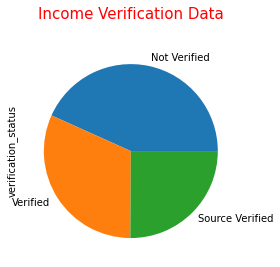

In [117]:
# Plot the distribution of verification status
print ((loandata.groupby(by='verification_status').size())/(loandata.verification_status.count())*100)
plt.title('Income Verification Data\n',fontsize=15,color='red')
loandata.verification_status.value_counts().plot.pie()
plt.show()

### Insights
From the plot above we can find that number of applications which had no verification is around half of the entire dataset
Around 25% are verified by 3rd party. 

#### Recommendations 
When the verification of income is not done it might lead to more defaulters. Annual income should be verified to avoid loss

##### Review/Plot home ownership

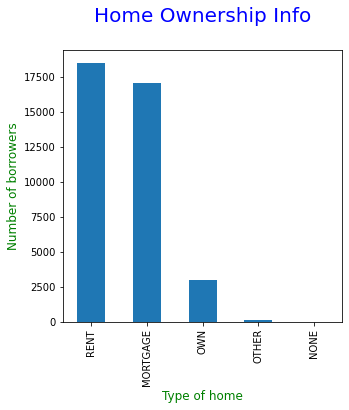

In [118]:
# Plot the home ownership info to see the frequency under each category
plt.figure(figsize=(5,5))
loandata.home_ownership.value_counts().plot.bar()
plt.title('Home Ownership Info\n',fontsize=20,color='b')
plt.xlabel("Type of home", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'g'})
plt.ylabel("Number of borrowers", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'g'})
plt.show()

In [119]:
# Determine the percentage of borrowers under each category
print ((loandata.groupby(by='home_ownership').size())/(loandata.home_ownership.count())*100)

home_ownership
MORTGAGE    44.122145
NONE         0.007777
OTHER        0.254037
OWN          7.711849
RENT        47.904192
dtype: float64


### Insights

From the plot and percentages above we can find that most borrowoers either rent or have a mortgage on their home. 

### Recommendations

1. As many rent/mortgage, a big chunk of their income would go towards it. Along with a low annual income will be a factor for defaulting
2. Check out the DTI (Debt to Income Ratio) - The lower the value higher the chances of default

##### Plot purpose of the loan

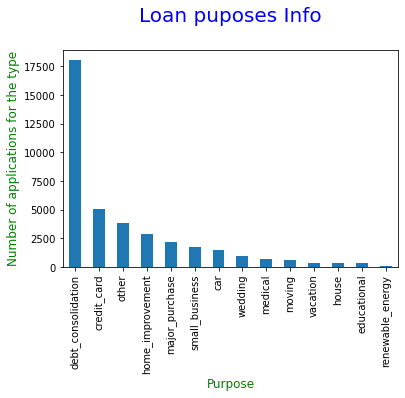

In [120]:
# plot the frequency distribution for various reasons the loan was applied for.
loandata.purpose.value_counts().plot.bar()
plt.title('Loan puposes Info\n',fontsize=20,color='b')
plt.xlabel("Purpose", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'g'})
plt.ylabel("Number of applications for the type", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'g'})
plt.show()

#### Insights 
Most of the loans had a applied for debt consolidation followed by credit cards

#### Recommendation
Determine the loan status when the purpose is these two high values. It would give an idea if there is any tilt towards defaulting

# Bivariate Analysis

In the above recommendation we saw DTI value has impact on loan status. Let's divide it into buckets and plot against loan status to infer some info

We saw most borrowers pay between 200 - 400 dollars as installement amount. It would be interesting to view how the annual income of the borrowers affects the installment 

In [121]:
# Create a annual income bucket based on their yearly earnings.
loandata['income_bucket'] = pd.qcut(loandata.annual_inc,[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])

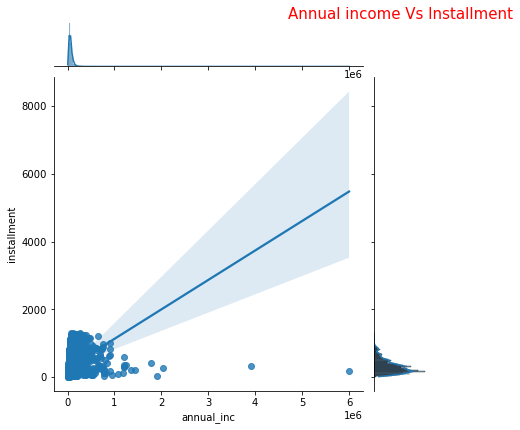

In [122]:
#Plot annual income against installement
sns.jointplot(x='annual_inc',y='installment',data=loandata,kind='reg')
plt.title('Annual income Vs Installment\n\n\n',fontsize=15,color='red')
plt.show()

### Insights
The installment amount paid is higher as the borrower's annual income goes up. 

### Recommendations 
Expected behavior and we can continue with other variables

## Let's check out the annual income affects loan status

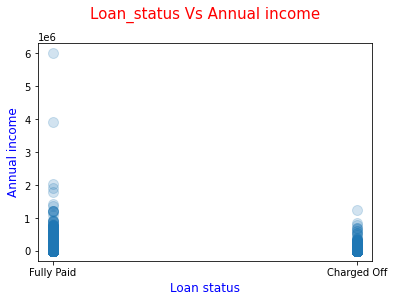

In [123]:
# Plot a scatter plot to view the distribution
plt.scatter(loandata.loan_status,loandata.annual_inc,alpha=0.2,s=100)
plt.title('Loan_status Vs Annual income\n',fontsize=15,color='red')
plt.xlabel("Loan status", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'b'})
plt.ylabel("Annual income", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'b'})
plt.show()

### Insights
Charge-off's are higher under low income/medium income range. Between 0 to 30K



##### Let's check interest rate and loan status

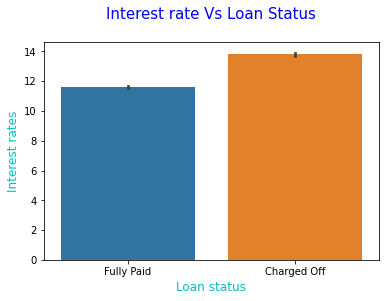

In [124]:
# Plot loanstatus and interest rates to see how interest rates impact loan status
sns.barplot(data=loandata,x='loan_status',y='int_rate')
plt.title('Interest rate Vs Loan Status\n',fontsize=15,color='b')
plt.xlabel("Loan status", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'c'})
plt.ylabel("Interest rates", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'c'})
plt.show()

### Insights
Charge-off's happens at all kinds of interest rates and is slightly higher when interest rate goes beyond 12%

## Check how annual income and loan amount affect the loan status

In [125]:
# Create loan amount bucket as new column based on the loan amount
loandata['loan_amnt_bucket'] = pd.qcut(loandata.loan_amnt,[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])

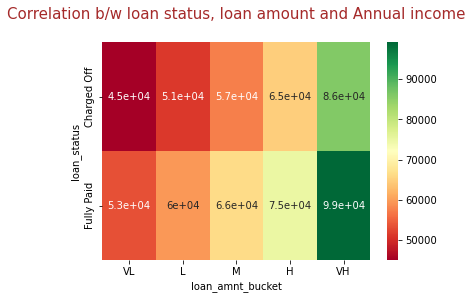

In [126]:
# Create a pivot table to plot the correlation between loan amount, loan status and annual income
res = loandata.pivot_table(index='loan_status',columns='loan_amnt_bucket',values='annual_inc')
sns.heatmap(res,cmap='RdYlGn',annot=True) 
plt.title('Correlation b/w loan status, loan amount and Annual income\n',fontsize=15,color='brown')
plt.show()

### Insights

<span style="color:blue;font-weight:700;font-size:15px"> ***From the above heat map we see that loans are more likely to chargeoff when the loan amount is low and annual income is less than medium value*** 

</span>  

### Recommendations 
Drill down futher to other variables

## Plot to see how residency impact loan status. 

In [127]:
# Create two dataframes for each of the loan status to simplfy further plotting
chargedoff = loandata[(loandata.loan_status) == 'Charged Off']
fullypaid  = loandata[loandata.loan_status == 'Fully Paid']

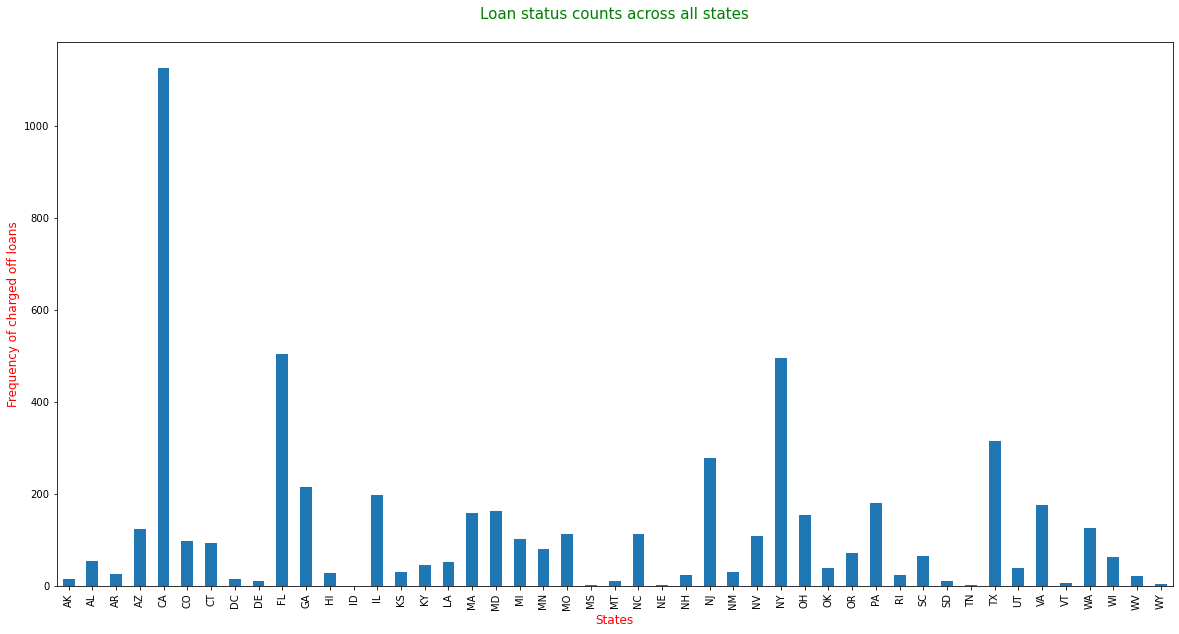

In [128]:
# Let's determine if there are any relation between states and charge-off's
plt.figure(figsize=[20,10])
grouped = (chargedoff.groupby('addr_state')['loan_status'].count()).plot.bar()
plt.title('Loan status counts across all states\n',fontsize=15,color='g')
plt.xlabel("States", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'r'})
plt.ylabel("Frequency of charged off loans", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'r'})
plt.show()

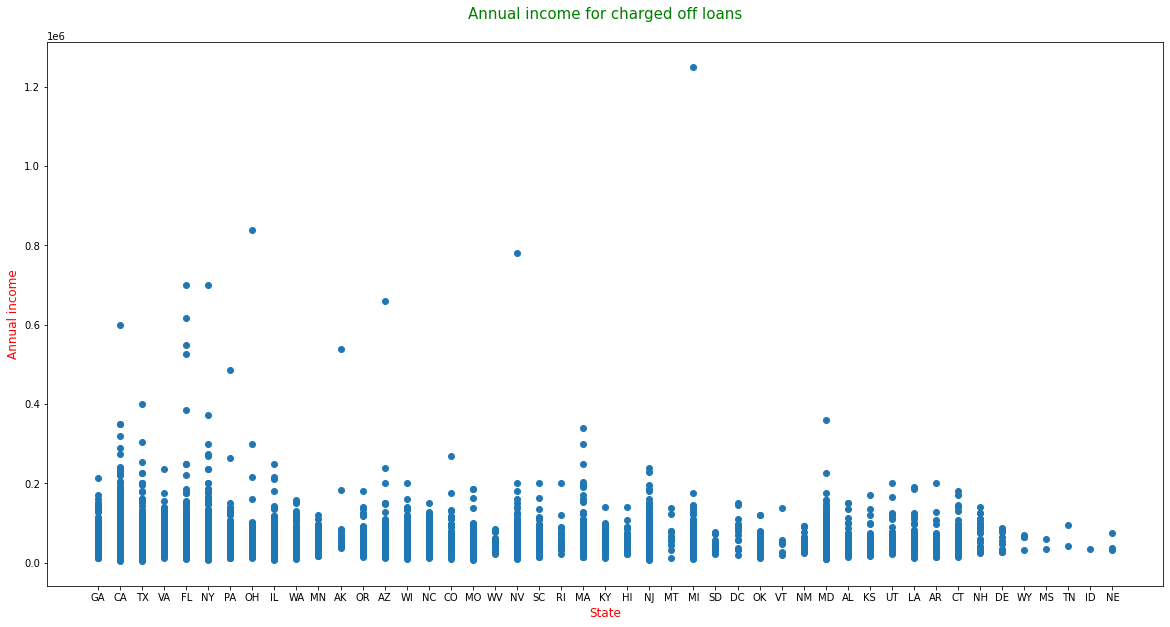

In [129]:
# Compare the loan status and annual income earned in the states
plt.figure(figsize=[20,10])
plt.scatter(chargedoff.addr_state,chargedoff.annual_inc)
plt.title('Annual income for charged off loans\n',fontsize=15,color='g')
plt.xlabel("State", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'r'})
plt.ylabel("Annual income", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'r'})
plt.show()

### Insights

<span style="color:blue;font-weight:1000;font-size:15px"> ***From the above plots, more loans are charged off in CA, FL, NY and TX. These are states where annual income is comparably high to other states. But the annual income of the borrower is low and cost of living is high*** 

</span>   

### Recommendations
These type of borrowers who live in states where cost of living is high, and have a low/medium annual income have higher probability of defaulting

## Determine how grades impact the loan status

In [130]:
# Create a new column grades by merging grade & subgrade
loandata['grades'] = loandata.grade + loandata.sub_grade

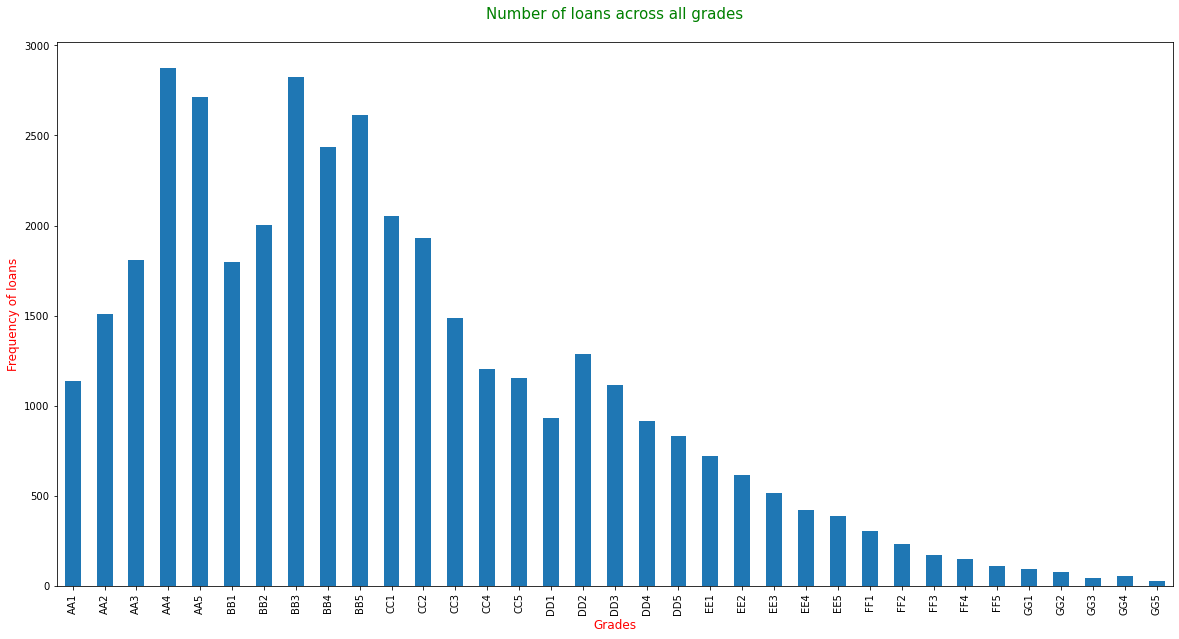

In [131]:
# Plot the loan status and grades to determine any correlation
plt.figure(figsize=[20,10])
grouped = (loandata.groupby('grades')['loan_status'].count()).plot.bar()
plt.title('Number of loans across all grades\n',fontsize=15,color='g')
plt.xlabel("Grades", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'r'})
plt.ylabel("Frequency of loans", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'r'})
plt.show()

### Insights -
More loans are under grades A and B and C

### Recommendations - 
Try to check how income is distributed for these grades

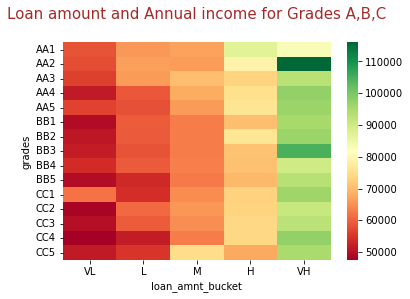

In [132]:
#How loan amount and annual income looks for Grades A, B, C 
grade_abc = loandata[(loandata.grade == 'B') | (loandata.grade == 'A') | (loandata.grade == 'C')]
grd = grade_abc.pivot_table(index='grades',columns='loan_amnt_bucket',values='annual_inc')
plt.title('Loan amount and Annual income for Grades A,B,C\n',fontsize=15,color='brown')
sns.heatmap(grd,cmap='RdYlGn')
plt.show()

### Insights
Grades AA4, CC4 - CC2 and BB5, BB3 - BB1 have low income when compared to other grades. These might impact borrowers paying the loan back

### Recommendations 
Determine the verification status so we can see if there are any relation to it

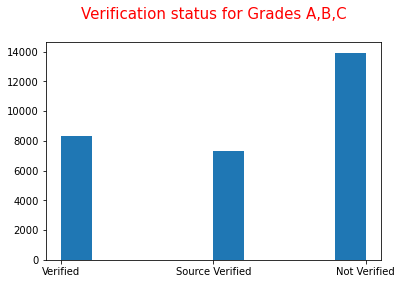

In [133]:
# Plot the verification status of the loans in grades A, B, C - Create a pivot table with Grades, loan amount bucket and dti
grade_abc = loandata[(loandata.grade == 'B') | (loandata.grade == 'C') | (loandata.grade == 'A')]
grd = grade_abc.pivot_table(index='grades',columns='loan_amnt_bucket',values='dti')

#plot the data derived 
plt.hist(grade_abc.verification_status)
plt.title('Verification status for Grades A,B,C\n',fontsize=15,color='red')
plt.show()

### Insights 
The number of applicants whose is income is Not verified is higher. Percentage of actual verification done is low compared to combined percentage of Source verified and Not verified

### Recommendations
When the borrowers fall under Grades AA4, CC4 - CC2 and BB5, BB3 - BB1, the probability of defaulting is higher when the income is not verified.

## Determine the relation between Loan status and DTI and annual income

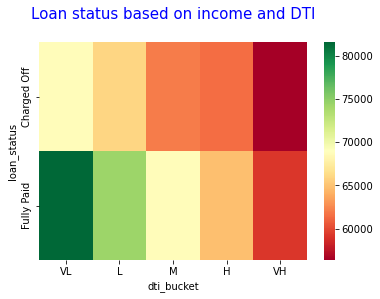

<Figure size 1080x1800 with 0 Axes>

In [134]:
# Create buckets for the dti value to plot it easier
loandata['dti_bucket'] = pd.qcut(loandata.dti,[0,0.2,0.4,0.6,0.8,1],['VL','L','M','H','VH'])

# Create a pivot table with data for loan status, dti bucket and annual income
int_r = loandata.pivot_table(index='loan_status',columns='dti_bucket',values='annual_inc')

# Plot heat map for pivot table
plt.title('Loan status based on income and DTI\n',fontsize=15,color='blue')
sns.heatmap(int_r,cmap='RdYlGn')
plt.figure(figsize=[15,25])
plt.show()

### Insights 
When DTI is too high and annual income is too low, charge off's are higher.
A low DTI and higher/medium income has higher probability of being fully repaying the loan

### Recommendations 
For a borrower when annual income is low or medium, the DTI value is expected to be very low or low to avoid defaulting

## Determine if the purpose of loan has impact on loan status

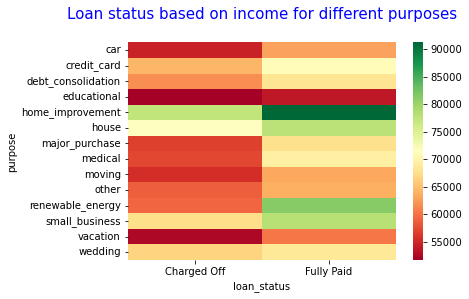

In [135]:
# Create a pivot table with data for loan status, dti bucket and annual income, purpose
prp = loandata.pivot_table(index='purpose',columns='loan_status',values='annual_inc')

# Plot heat map for pivot table
plt.title('Loan status based on income for different purposes\n',fontsize=15,color='blue')
sns.heatmap(prp,cmap='RdYlGn')
plt.show()

### Insights
When annual income is low, quite a number of purposes has higher risk of default

### Recommendations 
Let's try how the same varies with DTI

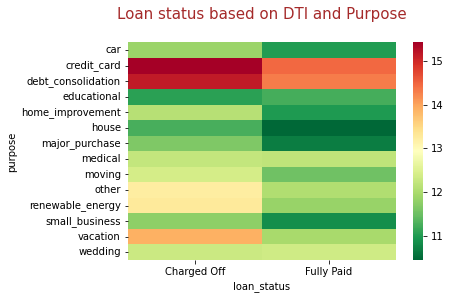

In [136]:
# Create a pivot table with data for purpose, loan status and dti bucket
prp1 = loandata.pivot_table(index='purpose',columns='loan_status',values='dti')

# Plot heat map for pivot table
plt.title('Loan status based on DTI and Purpose\n',fontsize=15,color='brown')
sns.heatmap(prp1,cmap='RdYlGn_r')
plt.show()

### Insights 
When DTI is higher and the most common purpose of debt consolidation, credit card are high risk factors.

### Recommendations
When a borrower has higher DTI and comes for a loan with purposes 'Debt Consolidation, credit card', they are highly likely to default

## Determine how the number of terms influences loan status based on annual income and dti

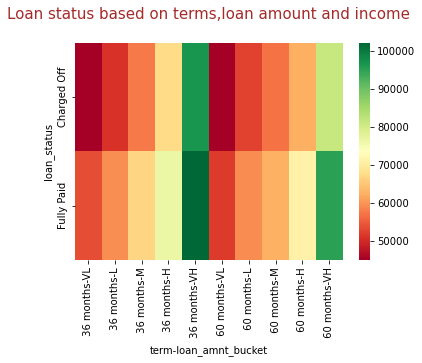

In [137]:
# Create a pivot table with data for term, loan status, loan amount bucket and annual income  
trm = loandata.pivot_table(index='loan_status',columns=['term','loan_amnt_bucket'],values='annual_inc')

# Plot heat map for pivot table
plt.title('Loan status based on terms,loan amount and income\n',fontsize=15,color='brown')
sns.heatmap(trm,cmap='RdYlGn')
plt.show()

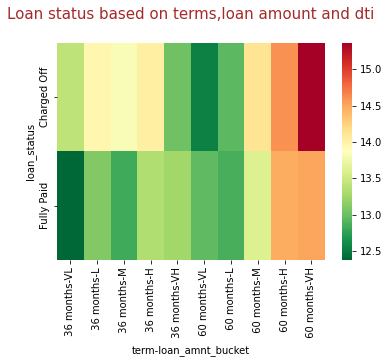

In [138]:
# Create a pivot table with data for term, loan status, loan amount bucket and dti 
trmdti = loandata.pivot_table(index='loan_status',columns=['term','loan_amnt_bucket'],values='dti')

# Plot heat map for pivot table
plt.title('Loan status based on terms,loan amount and dti\n',fontsize=15,color='brown')
sns.heatmap(trmdti,cmap='RdYlGn_r')
plt.show()

### Insights 
From the heatmaps above, 
1. Low annual income irrespective of the number of terms - higher chances of getting defaulted.
2. Though number of terms are higher, a higher DTI and medium to high loan amount - higher chances of default.

### Recommendations
When DTI is higher and number of terms opted by borrower is higher, the loan amount approved should be lesser to avoid these borrowers defaulting.
Lower income borrowers are always high risk of defaulting loans.

### Lower annual income seems to be a high risk factor from above visualizations. Let's try to understand how the employment length affects this

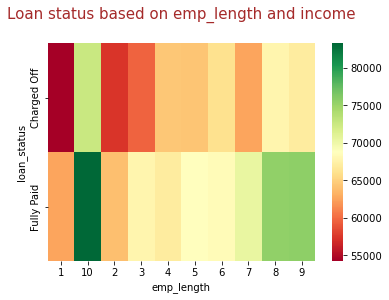

In [139]:
## With that said - lower annual income - how employment length impacts the lower annual income
# Create a pivot table with data for emp_length, loan status, and annual income  
empl = loandata.pivot_table(index='loan_status',columns=['emp_length'],values='annual_inc')

# Plot heat map for pivot table
plt.title('Loan status based on emp_length and income\n',fontsize=15,color='brown')
sns.heatmap(empl,cmap='RdYlGn')
plt.show()

### Insights
When the length of the employment is less than 3 years, the annual income falls under VL, L, and medium category.

### Recommendations
When employment length is low, the annual income will be low. Hence risk of defaulting is higher. 

# Conclusions

1. Loan status is impacted by the state the borrower resides in and home ownership. States with higher cost of living and low income will result in borrowers defaulting
2. Loan status is impacted by the grade the borrower belongs to. When the borrowers are in grades B and C and low income, then if annual income is not verified properly chances of defaulting is higher
3. Loan status is impacted by the DTI of the borrower. When DTI is higher and borrower has a low annual income, they are more likely to default
4. Loan status is impacted by loan amount when borrower has a low income and lesser loan amount, defaulting chances are higher. This could be due to human factor that we can somehow repay as the loan amount is lower and keep skipping installments
5. Loan status is impacted by the purpose when the borrower has higher DTI and low, medium annual income.
6. Loan amount approved should be lower when a borrower has a higher DTI and number of terms is higher. 
7. When annual income is low, irrespective of the loan amount and number of terms, chances for default is higher. These are huge risk borrowers.
8. When the length of employment is lesser (less than 3 years), the annual income is lesser. These are high risk borrowers